<a href="https://colab.research.google.com/github/Vey27/DeepLearning/blob/main/loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lending Club Loan Data Analysis
## Course-end Project 1

**DESCRIPTION**
bold text
Create a model that predicts whether or not a loan will be default using the historical data.

**Problem Statement:**  
For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that makes this problem more challenging.

**Domain**: Finance

Analysis to be done: Perform data preprocessing and build a deep learning prediction model. 

**Content:**
Dataset columns and definition:

**credit.policy:** 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

**purpose:** The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

**int.rate:** The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

**installment:** The monthly installments owed by the borrower if the loan is funded.

**log.annual.inc:** The natural log of the self-reported annual income of the borrower.

**dti:** The debt-to-income ratio of the borrower (amount of debt divided by annual income).

**fico**: The FICO credit score of the borrower.

**days.with.cr.line:** The number of days the borrower has had a credit line.

**revol.bal:** The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

**revol.util:** The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

**inq.last.6mths:** The borrower's number of inquiries by creditors in the last 6 months.

**delinq.2yrs:** The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

**pub.rec:** The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

 
**Steps to perform:**
Perform exploratory data analysis and feature engineering and then apply feature engineering. Follow up with a deep learning model to predict whether or not the loan will be default using the historical data.

Tasks:

1.     Feature Transformation

Transform categorical values into numerical values (discrete)

2.     Exploratory data analysis of different factors of the dataset.

3.     Additional Feature Engineering

You will check the correlation between features and will drop those features which have a strong correlation

This will help reduce the number of features and will leave you with the most relevant features

4.     Modeling

After applying EDA and feature engineering, you are now ready to build the predictive models

In this part, you will create a deep learning model using Keras with Tensorflow backend

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving loan_data.csv to loan_data.csv
User uploaded file "loan_data.csv" with length 751253 bytes


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline  

import pandas as pd, joblib

import warnings
warnings.filterwarnings('ignore')

In [4]:
df_loan=pd.read_csv("loan_data.csv")

In [5]:
df_loan.head()


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# 1.     Feature Transformation

Check the size of the dataset


In [6]:
df_loan.shape

(9578, 14)

In [33]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [9]:
df_loan.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


# 2.     Exploratory data analysis of different factors of the dataset.


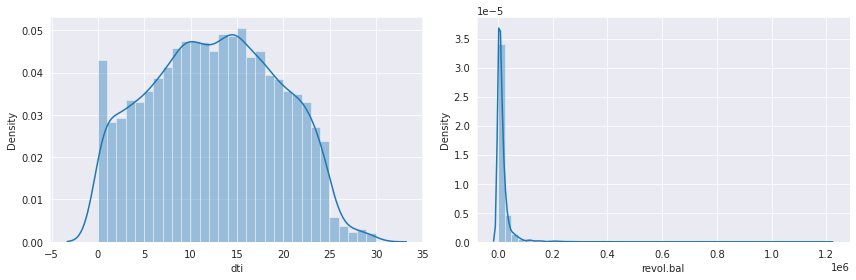

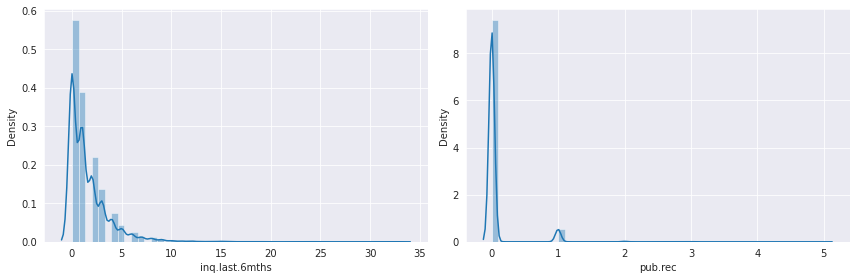

In [40]:
num_cols = ['dti','revol.bal', 'inq.last.6mths', 'pub.rec']
for i in range(0,len(num_cols),2):
 plt.figure(figsize=(12,4))
 plt.subplot(121)
 sns.distplot(df_loan[num_cols[i]], hist=True, kde=True)
 plt.subplot(122) 
 sns.distplot(df_loan[num_cols[i+1]], hist=True, kde=True)
 plt.tight_layout()
 plt.show()


# Observations:
1.   This borrower's income is same as debt, no money left over end of the month. 
2.   Decrease amount of unpaid at the end of the credit card billing cycle.
3.   The last six months reduced in borrower of inquiries by creditors
4.   Short spike, but was able to make payments, no frequency of deogatory public records. 













<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

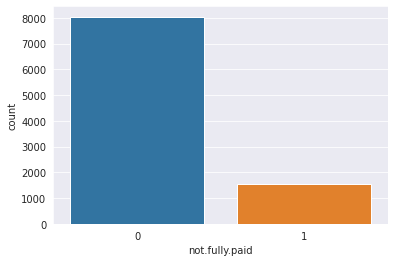

In [11]:
sns.set_style('darkgrid')
sns.countplot(x='not.fully.paid', data=df_loan)

# Check the label “no.fully.paid” distribution in the dataset.


The data is imblance the predication will be biased since
“not.fully.paid =0 “ has 83.9% filled, and only 16% is the “not.fully.paid=1”

In [36]:
df_loan['not.fully.paid'].isnull().mean()
df_loan.groupby('not.fully.paid')['not.fully.paid'].count()/len(df_loan)

not.fully.paid
0    0.839946
1    0.160054
Name: not.fully.paid, dtype: float64

# 3.     Additional Feature Engineering


Text(0.5, 0, 'FICO')

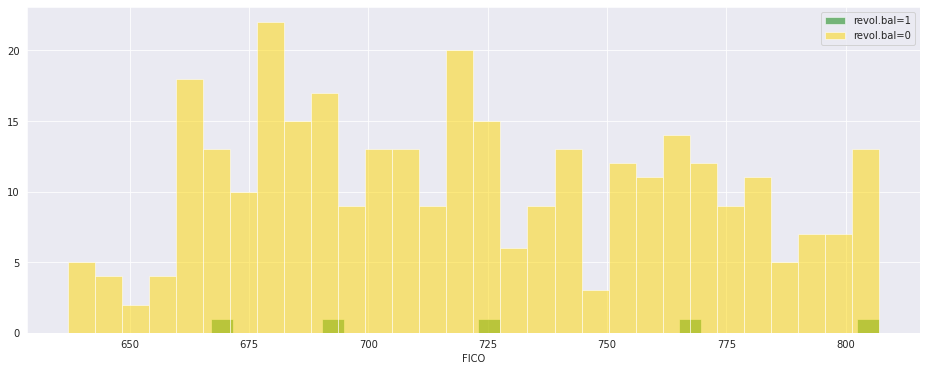

In [12]:
plt.figure(figsize=(16,6))
df_loan[df_loan['revol.bal']==1]['fico'].hist(alpha=0.5,color='green',bins=30,label='revol.bal=1')
df_loan[df_loan['revol.bal']==0]['fico'].hist(alpha=0.5,color='gold',bins=30,label='revol.bal=0')
plt.legend()
plt.xlabel('FICO')


<Figure size 792x504 with 0 Axes>

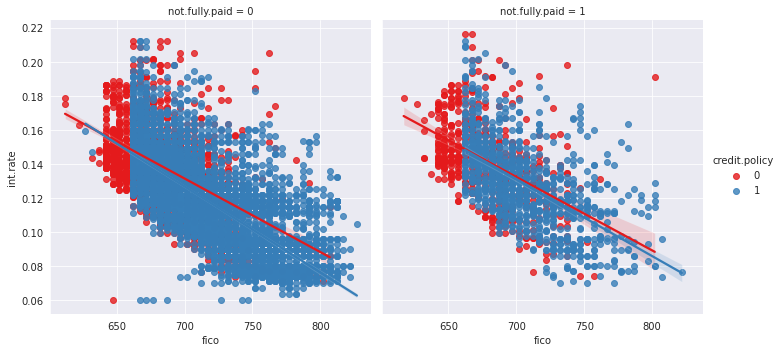

In [37]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=df_loan,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

**revol.bal:** The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

In [26]:
# create dummy variables
df_dummy=pd.get_dummies(data=df_loan,drop_first=True)

In [41]:
# separate x and y
x=df_dummy.drop(columns='not.fully.paid ')
y=df_dummy.not.fully.paid 



SyntaxError: ignored